In [87]:
from scipy.fft import fftfreq
from scipy.signal import welch
from librosa.core import amplitude_to_db
from drn_interactions.transforms import SpikesHandler
from drn_interactions.io import load_derived_generic
from scipy.ndimage import gaussian_filter1d
from scipy.stats import zscore
import seaborn as sns
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# sns.set_theme(context="paper", style="ticks")

In [7]:
neurons = load_derived_generic("neuron_types.csv")

In [83]:
fs = 2
d = 1 / fs
n = 200 * fs
sh = SpikesHandler(bin_width = d, block="pre", t_stop=1800)
df_binned = sh.binned_piv
df_binned = df_binned.transform(zscore).fillna(0)

f, _ = welch(df_binned.iloc[:, 1].values, fs=fs, nperseg=n, average="median")

res = df_binned.apply(lambda x: welch(x.values, fs=fs, nperseg=n)[1])

# res = res.transform(amplitude_to_db)
res.index = f

<AxesSubplot:ylabel='neuron_id'>

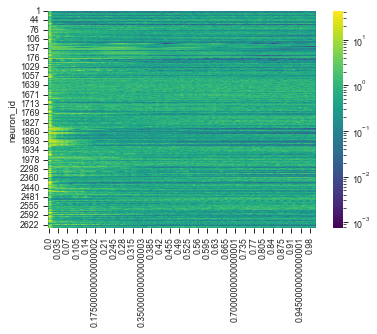

In [84]:
sns.heatmap(res.T, cmap="viridis", robust=True, norm=LogNorm())

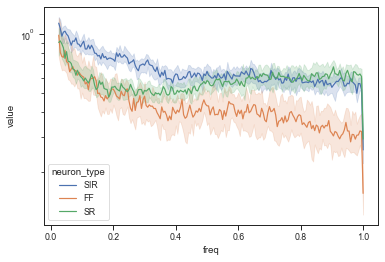

In [88]:
df_long = (
    res
    .reset_index()
    .rename(columns={"index": "freq"})
    .melt(id_vars="freq")
    .merge(neurons)
)


f = plt.figure()
ax = f.subplots()

sns.lineplot(
    data=df_long.query("freq > 0.02"),
    x="freq",
    y="value",
    hue="neuron_type",
    ax=ax,
    estimator=np.median
)

# ax.set_yscale("log")

<AxesSubplot:xlabel='freq', ylabel='value'>

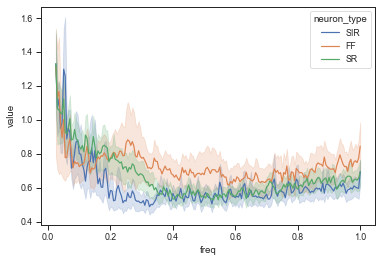

In [92]:
from scipy.stats import variation

f = plt.figure()
ax = f.subplots()
sns.lineplot(
    data=df_long.query("freq > 0.02"),
    x="freq",
    y="value",
    hue="neuron_type",
    ax=ax,
    estimator=variation
)